# CIS 508 Group Project Code for Spring '23

Included Machine learning algrothims:SVM, Random Forest, Neural Network, and KNN

Note, entire script may take 5-7 minutes to run, maybe more on a slower system.


Work completed by Data Team 1:
Krupa Joshi, 
Bhavana Vonteri, 
Smera Modani, 
Meghana Botu, 
Rocco Pagano, 

## Note, Path to BestCard_data.csv must be set on the line bellow!

In [13]:
#Common Path to the BestCard Dataset:
BCD_CSV_Path = r'BestCard_data(1)'

# SVM

SVM is widely used in predicting who will default next month as it has a high level of accuracy and flexibility to work with different types of data. It can handle both linear and non-linear data, it'll work with high-dimensional data, and identify complex patterns and relationships in the data.

In [14]:
import pandas as pd
#load and read dataset
d = pd.read_csv(BCD_CSV_Path)
d.head(5)

FileNotFoundError: [Errno 2] No such file or directory: 'BestCard_data(1)'

In [8]:
#cleaning the data by removing unnecessary columns, and categorical columns
d = d.drop(columns=['ID'])
d = d.drop(columns=['EDUCATION_CAT'])
d = d.drop(columns=['EDUCATION'])
d = d.drop(columns=['MARRIAGE'])
d.head(5)

NameError: name 'd' is not defined

In [4]:
#drop the target variable from X, and assign it to y
X = d.drop(columns = ['default payment next month']).values
y = d['default payment next month'].values

In [5]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler
#standardize and normalize input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC()

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred, average='macro'))
print('Recall:', recall_score(y_test, y_pred, average='macro'))
print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8252390774423402
Precision: 0.7659896551673488
Recall: 0.6505820661268696
F1 Score: 0.6772824689018677


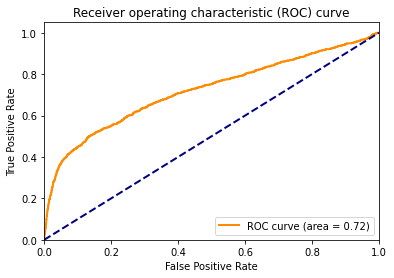

In [9]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1) from the model
y_prob = clf.decision_function(X_test)

# Compute the false positive rate (fpr), true positive rate (tpr), and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


# Random Forest

Random Forest Classifier is a good choice for predicting who will default next month because it can handle both categorical and numerical features, and is less prone to overfitting compared to other models. Additionally, random forests can handle large datasets and can provide feature importance measures which can help identify important predictors. The random forest collects the data of each tree and forecasts the future based on the majority of predictions, rather than relying on a single decision tree.

The n_estimators=50, max_depth=6 where chosen from a set of tests, these were the overall best values.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
d = pd.read_csv(BCD_CSV_Path)

In [12]:
# Get the dimensions of the dataframe
d.shape

(26664, 31)

In [13]:
# Print the number of columns and samples
print('Number of columns:', len(d.columns))
print('Number of samples:', len(d))


Number of columns: 31
Number of samples: 26664


In [14]:
# Print the types of features
print('Feature types:')
d.dtypes

Feature types:


ID                            object
LIMIT_BAL                      int64
SEX                            int64
EDUCATION                      int64
MARRIAGE                       int64
AGE                            int64
PAY_1                          int64
PAY_2                          int64
PAY_3                          int64
PAY_4                          int64
PAY_5                          int64
PAY_6                          int64
BILL_AMT1                      int64
BILL_AMT2                      int64
BILL_AMT3                      int64
BILL_AMT4                      int64
BILL_AMT5                      int64
BILL_AMT6                      int64
PAY_AMT1                       int64
PAY_AMT2                       int64
PAY_AMT3                       int64
PAY_AMT4                       int64
PAY_AMT5                       int64
PAY_AMT6                       int64
default payment next month     int64
EDUCATION_CAT                 object
graduate school                int64
h

In [15]:
# Print the first few rows of the data
print('Data preview:')
d.head(5)

Data preview:


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [16]:
# Check for missing data
print('Missing data:')
d.isnull().sum()

Missing data:


ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
EDUCATION_CAT                 0
graduate school               0
high school                   0
none                          0
others                        0
university                    0
dtype: i

In [17]:
#cleaning the data by removing unnecessary columns, and categorical columns
d = d.drop(columns=['ID'])
d = d.drop(columns=['EDUCATION_CAT'])
d = d.drop(columns=['EDUCATION'])
d = d.drop(columns=['MARRIAGE'])
d.head(5)

,LIMIT_BAL,SEX,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,graduate school,high school,none,others,university
0,20000,2,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,0,0,0,1
3,50000,2,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,0,0,0,1
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,0,0,0,0,1


In [18]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

#Drop default column for X and assign it to y
X = d.drop('default payment next month', axis=1)
y = d['default payment next month']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



In [19]:
# Train Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

#set up a random forest classifier with 50 trees, and a depth of upto 6 for each tree
rfc = RandomForestClassifier(n_estimators=50, max_depth=6, random_state=0)
rfc.fit(X_train, y_train)



RandomForestClassifier(max_depth=6, n_estimators=50, random_state=0)

In [20]:
# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
y_pred_train = rfc.predict(X_train)
y_pred_test = rfc.predict(X_test)

In [21]:
confusion_matrix_values = confusion_matrix(y_test, y_pred_test)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred_test))

Accuracy on test set:  0.8293643352709544


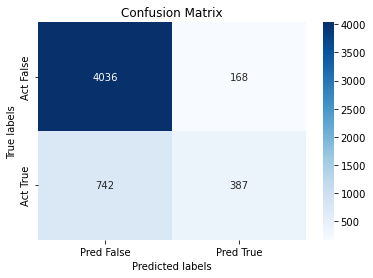

In [22]:
#Draw the confusion matrix with seaborn!
ax= plt.subplot()
sns.heatmap(confusion_matrix_values, annot=True, fmt='g', cmap='Blues');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pred False','Pred True']); ax.yaxis.set_ticklabels(['Act False','Act True']);

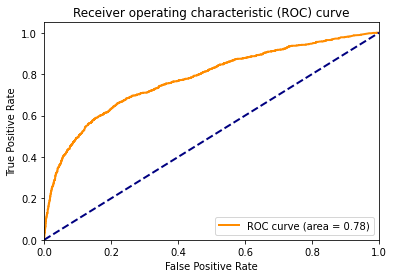

In [23]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1) from the model
y_prob = rfc.predict_proba(X_test)[:,1]

# Compute the false positive rate (fpr), true positive rate (tpr), and threshold values for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

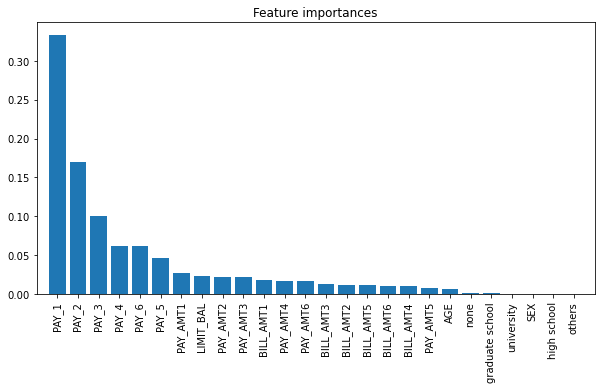

In [24]:
# Get the feature importances from the trained random forest classifier
importances = rfc.feature_importances_

# Get the names of the features
feature_names = X.columns

# Sort the features by importance in descending order
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Neural Network

Finalized Neural Network Script
This Script will create a deep neural network using the best hyper-parameters descovered durring testing.

Model input is a tensorflow or numpy compatable array of length 28.
Model output is a 2, shapped catagorical array with problability of [False Default Next Month, True Default Next Month]. Applying np.argmax to the output can transform this into a binary out with 0 being a False output and 1 being True.

In [25]:
#Load all modules first to verify there are no missing packages.
#It's quicker to identify missing dependencies by loading them all
#up front.
import pandas as pd
import numpy as np
import os

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import initializers
from tensorflow.keras import layers
from tensorflow import keras

import random
import numpy as np

In [26]:
#Select working directory and then the file name.
#spliting the location and file like this is useful for importing
#diffrent data sets, if desired.

#set a common seed value here. Replace with random.randint for testing.
seed_val = 12345

tf.random.set_seed(seed_val) #Everything has it's own random seed, and even setting
random.seed(seed_val)        #them all here, I still sometimes get diffrent rolls.
np.random.seed(seed_val)

#open file, drop unneed catagorical and string columns. Testing indicated there was no
#signficant diffrence for full column array, and a slightly turnicated array. So we
#will leave all other columns present.
df_BCD = pd.read_csv(BCD_CSV_Path)
df_BCD.drop(columns=['ID','EDUCATION_CAT'],inplace=True)

#shorter column names are easier to work with and understand. Also, not all modules
#play well with " " in column names.
df_BCD.rename(columns={'default payment next month':'default'},inplace=True)
df_BCD.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,graduate school,high school,none,others,university
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,1,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,0,2000,1,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,0,0,1
3,50000,2,2,1,37,0,0,0,0,0,...,1200,1100,1069,1000,0,0,0,0,0,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,10000,9000,689,679,0,0,0,0,0,1


In [27]:
df_BCD.dtypes #Just to verify data types, and check it imported correctly

LIMIT_BAL          int64
SEX                int64
EDUCATION          int64
MARRIAGE           int64
AGE                int64
PAY_1              int64
PAY_2              int64
PAY_3              int64
PAY_4              int64
PAY_5              int64
PAY_6              int64
BILL_AMT1          int64
BILL_AMT2          int64
BILL_AMT3          int64
BILL_AMT4          int64
BILL_AMT5          int64
BILL_AMT6          int64
PAY_AMT1           int64
PAY_AMT2           int64
PAY_AMT3           int64
PAY_AMT4           int64
PAY_AMT5           int64
PAY_AMT6           int64
default            int64
graduate school    int64
high school        int64
none               int64
others             int64
university         int64
dtype: object

In [28]:
#One more sanitiy check
if df_BCD.isnull().any().any():
    raise ValueError("Null or nans detected in data source")

In [29]:
#NNs preform best on scaled data of either [0,1] or [-1,1]. So we will use MinMaxScaler
#To do this
scaler = MinMaxScaler()
scaler.fit(df_BCD)
BCD_scaled = scaler.transform(df_BCD)
df_scaled = pd.DataFrame(BCD_scaled,columns = df_BCD.columns)
X = df_scaled.drop('default',axis=1)
y = keras.utils.to_categorical(df_scaled['default'])

In [30]:
X.shape #Verify output shape should be (-1,29)

(26664, 28)

In [31]:
y.shape #y should be be (-1,2) since it's now catagorical

(26664, 2)

In [32]:
X_Tr, X_Ts, y_Tr, y_Ts = train_test_split(X,y, test_size=.2,random_state=seed_val)
X_Tr.shape

(21331, 28)

In [33]:
X_Tr.head(5)# To Verify the random_state is correct. First 5 rows should be row index: 2022,17775,7537,2411,13188

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,graduate school,high school,none,others,university
26259,0.253165,0.0,0.000000,0.5,0.241379,0.2,0.2,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0
16960,0.075949,1.0,0.000000,0.5,0.137931,0.2,0.2,0.2,0.2,0.2,...,0.004107,0.002250,0.003221,0.028134,0.009458,1.0,0.0,0.0,0.0,0.0
13584,0.316456,1.0,0.333333,0.0,0.189655,0.2,0.2,0.2,0.2,0.2,...,0.002852,0.003374,0.004831,0.009378,0.007566,0.0,0.0,0.0,0.0,1.0
19969,0.025316,1.0,0.000000,0.0,0.344828,0.2,0.2,0.2,0.2,0.2,...,0.001271,0.001518,0.001610,0.001878,0.001892,1.0,0.0,0.0,0.0,0.0
3731,0.063291,0.0,0.333333,1.0,0.431034,0.2,0.2,0.4,0.4,0.4,...,0.001630,0.000000,0.003686,0.000000,0.002837,0.0,0.0,0.0,0.0,1.0


In [34]:
def buildModel(InputSz,weigntsInti,biasInit,activation, inLayerSizeMul, HdLayerSizeMul,HdLayerDepth,optimizer,seed_val=seed_val, **kwargs):
    """Wrap model build into a method, allows for easier replication of new models
    Args:
    InputSz - Size of the model input
    weigntsInti - keras.initializers function, used to initalize model weights 
    biasInit - keras.initializers function, used to initalize model biases
    activation - Activation function of the layer. i.e. keras.layers.ReLU
    inLayerSizeMul - A multiplyer for the input size
    HdLayerSizeMul - Additional Hidden Layer multipler used after first
    HdLayerDepth - An integer count of extra layers passed first hidden. Must be >0
    optimizer - Optimizer function used durring training, i.e. 'adam', 'RMSProp', 'SGD'...
    seed_val=seed_val - Common seed value for model. Can be changed for testing seed values
                      - On initalizers
    **kwargs - Not for now.
    Returns:
    keras.Model object.
    """
    #using the functional model of Keras. Seems better for building models algrothmically.
    ly_in1 = layers.Input(InputSz) 
    hd_ly = layers.Dense(int(InputSz*inLayerSizeMul),
        kernel_initializer=weigntsInti,
        bias_initializer=biasInit,
        activation=activation)(ly_in1)
    
    #build extra hidden layers
    for i in range(HdLayerDepth):
        hd_ly = layers.Dense(max(int(InputSz*HdLayerSizeMul*(1-(i/HdLayerDepth))),2),
            kernel_initializer=weigntsInti,
            bias_initializer=biasInit,
            activation=activation)(hd_ly)
    
    #last output latyer
    hd_ly = layers.Dense(2,
        kernel_initializer=weigntsInti,
        bias_initializer=biasInit,
        activation=activation)(hd_ly)
    
    #softmax on those last 2 outputs
    ly_out = layers.Softmax()(hd_ly)
    
    model = keras.Model(inputs=(ly_in1), outputs = ly_out)
    
    #categorical_crossentropy seems good for this type of output. Binary might be another
    #option to test later.
    model.compile(loss='categorical_crossentropy', optimizer=optimizer)
    return(model)

In [35]:
#build model:
model = buildModel(InputSz = X_Tr.shape[1],
                    weigntsInti = initializers.TruncatedNormal(mean=0.0, stddev=0.1,seed=seed_val), 
                    biasInit = initializers.Zeros(), 
                    activation = keras.activations.selu, 
                    inLayerSizeMul = 4,
                    HdLayerSizeMul = 4,
                    HdLayerDepth = 10,
                    optimizer = 'Adamax')

model.fit(X_Tr,y_Tr,epochs=10,batch_size=32)

Epoch 1/10
667/667 [==============================] - 34s 21ms/step - loss: 0.4795
Epoch 2/10
667/667 [==============================] - 13s 19ms/step - loss: 0.4563
Epoch 3/10
667/667 [==============================] - 13s 20ms/step - loss: 0.4528
Epoch 4/10
667/667 [==============================] - 13s 19ms/step - loss: 0.4479
Epoch 5/10
667/667 [==============================] - 14s 21ms/step - loss: 0.4441
Epoch 6/10
667/667 [==============================] - 13s 19ms/step - loss: 0.4420
Epoch 7/10
667/667 [==============================] - 13s 20ms/step - loss: 0.4399
Epoch 8/10
667/667 [==============================] - 13s 20ms/step - loss: 0.4389
Epoch 9/10
667/667 [==============================] - 13s 20ms/step - loss: 0.4388
Epoch 10/10
667/667 [==============================] - 13s 19ms/step - loss: 0.4372


In [36]:
y_Ts_Pred = model.predict(X_Ts)

167/167 [==============================] - 4s 12ms/step


All metrics are bellow. We have computed the Confusion matrix values, and ploted, along with the ROC curver and area under the curve below that.

One advantange with the softmax output is we get "predict_proba" for free, mostly.

In [37]:
#Get Accuracy score for the model
accscore = accuracy_score(y_Ts_Pred.argmax(axis=1),y_Ts.argmax(axis=1))
print(f"Accuracy = {accscore:.5f}")

Accuracy = 0.81980


In [38]:
#Get confusion matrics values (TP,TN,FP,FN)
con_mat = confusion_matrix(y_Ts.argmax(axis=1),y_Ts_Pred.argmax(axis=1))

In [39]:
con_mat

array([[3986,  185],
       [ 776,  386]], dtype=int64)

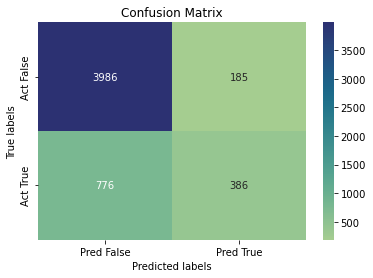

In [40]:
#Draw the confusion matrix with seaborn!
ax= plt.subplot()
sns.heatmap(con_mat, annot=True, fmt='g', cmap="crest") #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pred False','Pred True']); ax.yaxis.set_ticklabels(['Act False','Act True']);

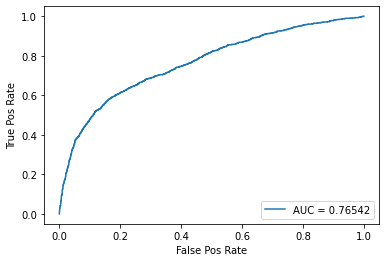

In [41]:
#since our model output is from a softmax, we get the proba for free, mostly.
#Idx1 is the True label.
fpr, tpr, _ = metrics.roc_curve(y_Ts.argmax(axis=1),  y_Ts_Pred[:,1])
auc_score = metrics.roc_auc_score(y_Ts.argmax(axis=1),  y_Ts_Pred[:,1])
#create the ROC curve
plt.plot(fpr,tpr,label = f"AUC = {auc_score:.5f}")
plt.ylabel('True Pos Rate')
plt.xlabel('False Pos Rate')
plt.legend(loc=4)
plt.show()

# KNN

The performance of the model depends on the previous data. The model may not perform well if the dataset is too noisy or small. In the case of credit card defaulters, there are many features relevant to making predictions. Therefore, while KNN can be a good model for predicting credit card defaults in some situations, it is not always the best choice as we can see in this case.

In [42]:
import pandas as pd

In [43]:
credit = pd.read_csv(BCD_CSV_Path)

In [44]:
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,none,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,1,university,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,0,2000,1,university,0,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,5000,0,university,0,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1100,1069,1000,0,university,0,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,9000,689,679,0,university,0,0,0,0,1


In [45]:
credit.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month', 'EDUCATION_CAT', 'graduate school',
       'high school', 'none', 'others', 'university'],
      dtype='object')

In [46]:
#Get X values by droping categotical columns and y-target column. Set y to y-target column
X = credit.drop(["EDUCATION_CAT", "ID",'default payment next month'], axis=1)
y = credit['default payment next month']

In [47]:
X.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,graduate school,high school,none,others,university
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,1500,1000,1000,1000,5000,0,0,0,0,1
3,50000,2,2,1,37,0,0,0,0,0,...,2019,1200,1100,1069,1000,0,0,0,0,1
4,50000,1,2,1,57,-1,0,-1,0,0,...,36681,10000,9000,689,679,0,0,0,0,1


In [48]:
import numpy as np 
from sklearn import preprocessing

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#split into training and text
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#Scaling the data gives us better results and higher accuracy.
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
#Create the KNN with k = 15 and dimetion 1 (Manhattan distance)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15,p=1)

In [51]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15, p=1)

In [52]:
#Verify the KNN score, should be the same a accuracy
knn.score(X_test,y_test)

0.8169885617851116

In [53]:
y_pred = knn.predict(X_test)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

C:\Users\smodani1\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


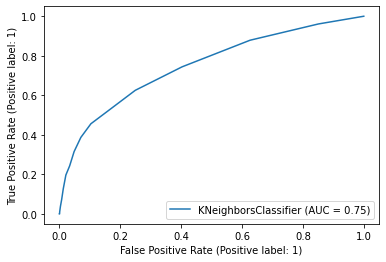

In [55]:
#Plot ROC, and AUC values
metrics.plot_roc_curve(knn, X_test, y_test)
plt.show()

In [56]:
#Get Confusion matrix and scores
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

confusion_matrix_values = confusion_matrix(y_test, y_pred)
print("Accuracy on test set: ", accuracy_score(y_test, y_pred))
print(f"Confusion matrix: \n{confusion_matrix_values}", )

Accuracy on test set:  0.8169885617851116
Confusion matrix: 
[[4001  203]
 [ 773  356]]


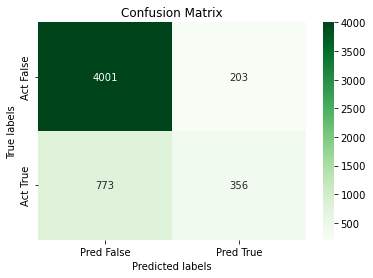

In [58]:
#Draw the confusion matrix with seaborn!
ax= plt.subplot()
sns.heatmap(confusion_matrix_values,annot=True, fmt='g', cmap='Greens');  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Pred False','Pred True']); ax.yaxis.set_ticklabels(['Act False','Act True']);